## Name: Amey Dhote

## Email: ameydhotesocialclub@gmail.com

In [18]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('voice.csv')

In [3]:
df.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,male
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,male
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,male
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,male
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,male


In [10]:
# Dropping rows with null values if any
df = df.dropna()

In [38]:
gender_labels = ['male','female']

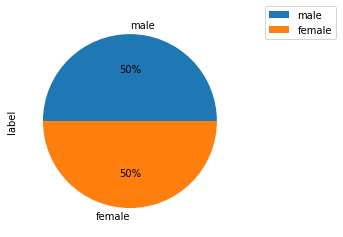

In [43]:
df['label'].value_counts().plot(kind='pie',autopct='%.0f%%')

plt.legend(bbox_to_anchor=(1.1, 1.05))

In [44]:
from sklearn.model_selection import train_test_split

In [51]:
X = df.drop(['label'], axis=1)

y = df['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

# a. Decision Tree


In [52]:
from sklearn.tree import DecisionTreeClassifier

In [53]:
dtc = DecisionTreeClassifier()

In [54]:
dtc.fit(X_train, y_train)

DecisionTreeClassifier()

In [55]:
dtc_predictions = dtc.predict(X_test)

In [56]:
from sklearn.metrics import confusion_matrix, classification_report

In [57]:
print(confusion_matrix(y_test, dtc_predictions))
print('\n')
print(classification_report(y_test, dtc_predictions))

[[293   4]
 [ 18 319]]


              precision    recall  f1-score   support

      female       0.94      0.99      0.96       297
        male       0.99      0.95      0.97       337

    accuracy                           0.97       634
   macro avg       0.96      0.97      0.97       634
weighted avg       0.97      0.97      0.97       634



# b. Random Forest Classifier


In [61]:
from sklearn.ensemble import RandomForestClassifier

In [62]:
rfc = RandomForestClassifier()

In [63]:
rfc.fit(X_train, y_train)

RandomForestClassifier()

In [64]:
rfc_predictions = rfc.predict(X_test)

In [65]:
print(confusion_matrix(y_test, rfc_predictions))
print('\n')
print(classification_report(y_test, rfc_predictions))

[[295   2]
 [  7 330]]


              precision    recall  f1-score   support

      female       0.98      0.99      0.98       297
        male       0.99      0.98      0.99       337

    accuracy                           0.99       634
   macro avg       0.99      0.99      0.99       634
weighted avg       0.99      0.99      0.99       634



# c. KNN Classifier

In [66]:
from sklearn.neighbors import KNeighborsClassifier

In [67]:
knn = KNeighborsClassifier(n_neighbors=39)

In [68]:
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=39)

In [69]:
knn_predictions = knn.predict(X_test)

In [70]:
print(confusion_matrix(y_test, knn_predictions))
print('\n')
print(classification_report(y_test, knn_predictions))

[[203  94]
 [115 222]]


              precision    recall  f1-score   support

      female       0.64      0.68      0.66       297
        male       0.70      0.66      0.68       337

    accuracy                           0.67       634
   macro avg       0.67      0.67      0.67       634
weighted avg       0.67      0.67      0.67       634



# d. Logistic Regression

In [71]:
from sklearn.linear_model import LogisticRegression

In [72]:
lr = LogisticRegression()

In [73]:
lr.fit(X_train, y_train)

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [74]:
lr_predictions = lr.predict(X_test)

In [75]:
print(confusion_matrix(y_test, lr_predictions))
print('\n')
print(classification_report(y_test, lr_predictions))

[[234  63]
 [ 56 281]]


              precision    recall  f1-score   support

      female       0.81      0.79      0.80       297
        male       0.82      0.83      0.83       337

    accuracy                           0.81       634
   macro avg       0.81      0.81      0.81       634
weighted avg       0.81      0.81      0.81       634



# e. SVM (Support Vector Machine) Classifier (with linear kernel)

In [78]:
from sklearn.svm import SVC

In [79]:
svc = SVC(kernel='linear') 

In [80]:
svc.fit(X_train, y_train)

SVC(kernel='linear')

In [81]:
svc_predictions = svc.predict(X_test)

In [82]:
print(confusion_matrix(y_test, svc_predictions))
print('\n')
print(classification_report(y_test, svc_predictions))

[[265  32]
 [  5 332]]


              precision    recall  f1-score   support

      female       0.98      0.89      0.93       297
        male       0.91      0.99      0.95       337

    accuracy                           0.94       634
   macro avg       0.95      0.94      0.94       634
weighted avg       0.94      0.94      0.94       634



# Model with best accuracy

Accuracies:

Decision Tree = 97% <br> <br>
Random Forest Classifier = 99% <br> <br>
KNN Classifier = 67% <br> <br>
Logistic Regression = 81% <br> <br>
SVM Classifier (with linear kernel) = 94% <br> <br>
 

# Therefore, "Random Forest Classifier" is the best performing model with an accuracy of 99% and 0.98 or 98% and 0.99 or 99% f1-score for prediction of female and male gender respectively .